## GAM

In [201]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from datetime import datetime, timedelta

from pygam import LinearGAM, LogisticGAM

In [293]:
data = pd.read_csv('/Users/Bakso/Documents/git/604Final/data/daily_data.csv')
data.dropna(inplace = True)

data['day_of_month'] = pd.to_datetime(data['date']).dt.day
data['month'] = pd.to_datetime(data['date']).dt.month
data['year'] = pd.to_datetime(data['date']).dt.year


end_date = pd.to_datetime('2023-12-02')
data = data[(pd.to_datetime(data['date']) <= end_test_date)]

data.head()

,station,date,temp_max,temp_mean,temp_min,rainfall,snow,day_of_month,month,year
0,72202,2013-12-03,26.1,25.425000,23.9,False,False,3,12,2013
1,72202,2013-12-04,27.2,23.812500,21.1,False,False,4,12,2013
2,72202,2013-12-05,27.8,24.270833,21.1,False,False,5,12,2013
3,72202,2013-12-06,27.8,25.450000,24.4,False,False,6,12,2013
4,72202,2013-12-07,27.8,24.629167,21.7,True,False,7,12,2013


In [294]:
data1 = data.iloc[1:].reset_index(drop=True)

# 1 day ago data
data1['yest_temp_max'] = data['temp_max'].shift(1)[1:].reset_index(drop=True)
data1['yest_temp_mean'] = data['temp_mean'].shift(1)[1:].reset_index(drop=True)
data1['yest_temp_min'] = data['temp_min'].shift(1)[1:].reset_index(drop=True)
data1['yest_rainfall'] = data['rainfall'].shift(1)[1:].reset_index(drop=True)
data1['yest_snow'] = data['snow'].shift(1)[1:].reset_index(drop=True)


data1.head()

,station,date,temp_max,temp_mean,temp_min,rainfall,snow,day_of_month,month,year,yest_temp_max,yest_temp_mean,yest_temp_min,yest_rainfall,yest_snow
0,72202,2013-12-04,27.2,23.812500,21.1,False,False,4,12,2013,26.1,25.425000,23.9,False,False
1,72202,2013-12-05,27.8,24.270833,21.1,False,False,5,12,2013,27.2,23.812500,21.1,False,False
2,72202,2013-12-06,27.8,25.450000,24.4,False,False,6,12,2013,27.8,24.270833,21.1,False,False
3,72202,2013-12-07,27.8,24.629167,21.7,True,False,7,12,2013,27.8,25.450000,24.4,False,False
4,72202,2013-12-08,28.0,25.058333,22.8,True,False,8,12,2013,27.8,24.629167,21.7,True,False


In [295]:
data2 = data.iloc[2:].reset_index(drop=True)

# 2 day ago data
data2['yest2_temp_max'] = data['temp_max'].shift(2)[2:].reset_index(drop=True)
data2['yest2_temp_mean'] = data['temp_mean'].shift(2)[2:].reset_index(drop=True)
data2['yest2_temp_min'] = data['temp_min'].shift(2)[2:].reset_index(drop=True)
data2['yest2_rainfall'] = data['rainfall'].shift(2)[2:].reset_index(drop=True)
data2['yest2_snow'] = data['snow'].shift(2)[2:].reset_index(drop=True)


data2.head()

,station,date,temp_max,temp_mean,temp_min,rainfall,snow,day_of_month,month,year,yest2_temp_max,yest2_temp_mean,yest2_temp_min,yest2_rainfall,yest2_snow
0,72202,2013-12-05,27.8,24.270833,21.1,False,False,5,12,2013,26.1,25.425000,23.9,False,False
1,72202,2013-12-06,27.8,25.450000,24.4,False,False,6,12,2013,27.2,23.812500,21.1,False,False
2,72202,2013-12-07,27.8,24.629167,21.7,True,False,7,12,2013,27.8,24.270833,21.1,False,False
3,72202,2013-12-08,28.0,25.058333,22.8,True,False,8,12,2013,27.8,25.450000,24.4,False,False
4,72202,2013-12-09,28.3,25.858333,24.4,False,False,9,12,2013,27.8,24.629167,21.7,True,False


In [296]:
data3 = data.iloc[3:].reset_index(drop=True)

# 3 day ago data
data3['yest3_temp_max'] = data['temp_max'].shift(3)[3:].reset_index(drop=True)
data3['yest3_temp_mean'] = data['temp_mean'].shift(3)[3:].reset_index(drop=True)
data3['yest3_temp_min'] = data['temp_min'].shift(3)[3:].reset_index(drop=True)
data3['yest3_rainfall'] = data['rainfall'].shift(3)[3:].reset_index(drop=True)
data3['yest3_snow'] = data['snow'].shift(3)[3:].reset_index(drop=True)

data3.head()

,station,date,temp_max,temp_mean,temp_min,rainfall,snow,day_of_month,month,year,yest3_temp_max,yest3_temp_mean,yest3_temp_min,yest3_rainfall,yest3_snow
0,72202,2013-12-06,27.8,25.450000,24.4,False,False,6,12,2013,26.1,25.425000,23.9,False,False
1,72202,2013-12-07,27.8,24.629167,21.7,True,False,7,12,2013,27.2,23.812500,21.1,False,False
2,72202,2013-12-08,28.0,25.058333,22.8,True,False,8,12,2013,27.8,24.270833,21.1,False,False
3,72202,2013-12-09,28.3,25.858333,24.4,False,False,9,12,2013,27.8,25.450000,24.4,False,False
4,72202,2013-12-10,27.8,25.520833,23.3,False,False,10,12,2013,27.8,24.629167,21.7,True,False


In [297]:
data4 = data.iloc[4:].reset_index(drop=True)

# 4 day ago data
data4['yest4_temp_max'] = data['temp_max'].shift(4)[4:].reset_index(drop=True)
data4['yest4_temp_mean'] = data['temp_mean'].shift(4)[4:].reset_index(drop=True)
data4['yest4_temp_min'] = data['temp_min'].shift(4)[4:].reset_index(drop=True)
data4['yest4_rainfall'] = data['rainfall'].shift(4)[4:].reset_index(drop=True)
data4['yest4_snow'] = data['snow'].shift(4)[4:].reset_index(drop=True)

data4.head()

,station,date,temp_max,temp_mean,temp_min,rainfall,snow,day_of_month,month,year,yest4_temp_max,yest4_temp_mean,yest4_temp_min,yest4_rainfall,yest4_snow
0,72202,2013-12-07,27.8,24.629167,21.7,True,False,7,12,2013,26.1,25.425000,23.9,False,False
1,72202,2013-12-08,28.0,25.058333,22.8,True,False,8,12,2013,27.2,23.812500,21.1,False,False
2,72202,2013-12-09,28.3,25.858333,24.4,False,False,9,12,2013,27.8,24.270833,21.1,False,False
3,72202,2013-12-10,27.8,25.520833,23.3,False,False,10,12,2013,27.8,25.450000,24.4,False,False
4,72202,2013-12-11,28.3,25.458333,23.3,True,False,11,12,2013,27.8,24.629167,21.7,True,False


### Mean Temp Model 

In [257]:
latest_date = pd.to_datetime(data1['date']).max()
nine_days_ago = latest_date - timedelta(days=9)

test_data = data1[pd.to_datetime(data1['date']) > nine_days_ago]
train_data = data1[pd.to_datetime(data1['date']) < nine_days_ago]

In [ ]:
repeat_counts = {
    '2023-11-24': 1,
    '2023-11-25': 2,
    '2023-11-26': 3,
    '2023-11-27': 4,
    '2023-11-28': 4,
    '2023-11-29': 3,
    '2023-11-30': 2,
    '2023-12-01': 1
}

duplicated_test_data = pd.DataFrame()
for date, count in repeat_counts.items():
    subset = test_data[test_data['date'] == date]
    duplicated_test_data = duplicated_test_data.append([subset] * count, ignore_index=True)

duplicated_test_data.head()

In [258]:
y = train_data1['temp_mean']
X = train_data1[['day_of_month', 'month', 'year', 'yest_temp_mean', 'station']]
X_testd = duplicated_test_data[['day_of_month', 'month', 'year', 'yest_temp_mean', 'station']]
y_testd = duplicated_test_data['temp_mean']
X_test = test_data1[['day_of_month', 'month', 'year', 'yest_temp_mean', 'station']]
y_test = test_data1['temp_mean']

In [259]:
gam = LinearGAM().fit(X,y)
predictions = gam.predict(X_test)

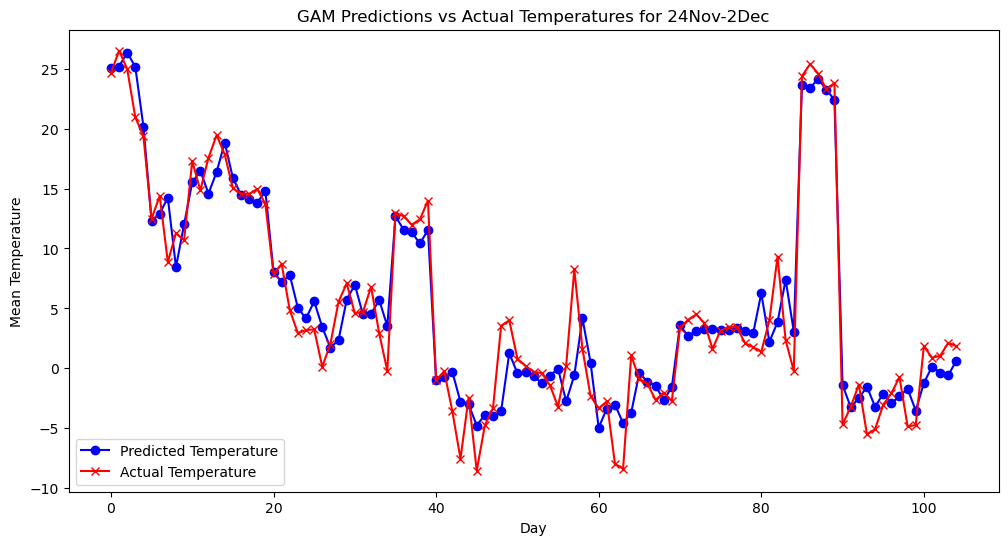

In [260]:
plt.figure(figsize=(12, 6))
plt.plot(predictions, label='Predicted Temperature', color='blue', marker='o')
plt.plot(y_test.values, label='Actual Temperature', color='red', marker='x')
plt.title('GAM Predictions vs Actual Temperatures for 24Nov-2Dec')
plt.xlabel('Day')
plt.ylabel('Mean Temperature')
plt.legend()
# plt.show()
plt.savefig('GAM Predictions')

In [298]:
data1['station'] = data1['station'].astype('category', copy=True).cat.codes
data2['station'] = data2['station'].astype('category', copy=True).cat.codes
data3['station'] = data2['station'].astype('category', copy=True).cat.codes
data4['station'] = data2['station'].astype('category', copy=True).cat.codes


start_test_date1 = pd.to_datetime('2023-11-25')
end_test_date1 = pd.to_datetime('2023-11-29')

start_test_date2 = pd.to_datetime('2023-11-26')
end_test_date2 = pd.to_datetime('2023-11-30')

start_test_date3 = pd.to_datetime('2023-11-27')
end_test_date3 = pd.to_datetime('2023-12-01')

start_test_date4 = pd.to_datetime('2023-11-28')
end_test_date4 = pd.to_datetime('2023-12-02')

train_data1 = data1[pd.to_datetime(data1['date']) <= nine_days_ago]
test_data1 = data1[(pd.to_datetime(data1['date']) >= start_test_date1) & (pd.to_datetime(data1['date']) <= end_test_date1)]

train_data2 = data2[pd.to_datetime(data2['date']) <= nine_days_ago]
test_data2 = data2[(pd.to_datetime(data2['date']) >= start_test_date2) & (pd.to_datetime(data2['date']) <= end_test_date2)]

train_data3 = data3[pd.to_datetime(data3['date']) <= nine_days_ago]
test_data3 = data3[(pd.to_datetime(data3['date']) >= start_test_date3) & (pd.to_datetime(data3['date']) <= end_test_date3)]

train_data4 = data4[pd.to_datetime(data4['date']) <= nine_days_ago]
test_data4 = data4[(pd.to_datetime(data4['date']) >= start_test_date4) & (pd.to_datetime(data4['date']) <= end_test_date4)]

In [300]:
y1 = train_data1['temp_mean']
X1 = train_data1[['day_of_month', 'month', 'year', 'yest_temp_mean', 'station']]
X_test1 = test_data1[['day_of_month', 'month', 'year', 'yest_temp_mean', 'station']]
y_test1 = test_data1['temp_mean']

y2 = train_data2['temp_mean']
X2 = train_data2[['day_of_month', 'month', 'year', 'yest2_temp_mean', 'station']]
X_test2 = test_data2[['day_of_month', 'month', 'year', 'yest2_temp_mean', 'station']]
y_test2 = test_data2['temp_mean']

y3 = train_data3['temp_mean']
X3 = train_data3[['day_of_month', 'month', 'year', 'yest3_temp_mean', 'station']]
X_test3 = test_data3[['day_of_month', 'month', 'year', 'yest3_temp_mean', 'station']]
y_test3 = test_data3['temp_mean']

y4 = train_data4['temp_mean']
X4 = train_data4[['day_of_month', 'month', 'year', 'yest4_temp_mean', 'station']]
X_test4 = test_data4[['day_of_month', 'month', 'year', 'yest4_temp_mean', 'station']]
y_test4 = test_data4['temp_mean']

In [301]:
mean_gam1 = LinearGAM().fit(X1,y1)
mean_gam2 = LinearGAM().fit(X2,y2)
mean_gam3 = LinearGAM().fit(X3,y3)
mean_gam4 = LinearGAM().fit(X4,y4)

In [302]:
predictions1 = mean_gam1.predict(X_test1)
predictions2 = mean_gam2.predict(X_test2)
predictions3 = mean_gam3.predict(X_test3)
predictions4 = mean_gam4.predict(X_test4)

rmse1 = np.sqrt(mean_squared_error(np.array(y_test1), predictions1))
rmse2 = np.sqrt(mean_squared_error(np.array(y_test2), predictions2))
rmse3 = np.sqrt(mean_squared_error(np.array(y_test3), predictions3))
rmse4 = np.sqrt(mean_squared_error(np.array(y_test4), predictions4))
rmse1+rmse2+rmse3+rmse4/4

8.619925356786245

In [ ]:
pdeps,confi = gam.partial_dependence(term =1 ,width=0.95)

plt.figure(figsize=(10, 6))
plt.plot(X_test.iloc[:,1], pdeps, color='blue', lw=2)
plt.fill_between(X_test.iloc[:,1], confi[:, 0], confi[:, 1], color='blue', alpha=0.2)
plt.title('Partial Dependence Plot for term 1')
plt.xlabel('Feature value')
plt.ylabel('Partial dependence')
plt.show()

## Min Temp

In [303]:
ymin1 = train_data1['temp_min']
Xmin1 = train_data1[['day_of_month', 'month', 'year', 'yest_temp_min', 'station']]
Xmin_test1 = test_data1[['day_of_month', 'month', 'year', 'yest_temp_min', 'station']]
ymin_test1 = test_data1['temp_min']

ymin2 = train_data2['temp_min']
Xmin2 = train_data2[['day_of_month', 'month', 'year', 'yest2_temp_min', 'station']]
Xmin_test2 = test_data2[['day_of_month', 'month', 'year', 'yest2_temp_min', 'station']]
ymin_test2 = test_data2['temp_min']

ymin3 = train_data3['temp_min']
Xmin3 = train_data3[['day_of_month', 'month', 'year', 'yest3_temp_min', 'station']]
Xmin_test3 = test_data3[['day_of_month', 'month', 'year', 'yest3_temp_min', 'station']]
ymin_test3 = test_data3['temp_min']

ymin4 = train_data4['temp_min']
Xmin4 = train_data4[['day_of_month', 'month', 'year', 'yest4_temp_min', 'station']]
Xmin_test4 = test_data4[['day_of_month', 'month', 'year', 'yest4_temp_min', 'station']]
ymin_test4 = test_data4['temp_min']

In [304]:
min_gam1 = LinearGAM().fit(Xmin1,ymin1)
min_gam2 = LinearGAM().fit(Xmin2,ymin2)
min_gam3 = LinearGAM().fit(Xmin3,ymin3)
min_gam4 = LinearGAM().fit(Xmin4,ymin4)

In [305]:
min_predictions1 = min_gam1.predict(Xmin_test1)
min_predictions2 = min_gam2.predict(Xmin_test2)
min_predictions3 = min_gam3.predict(Xmin_test3)
min_predictions4 = min_gam4.predict(Xmin_test4)

rmse1 = np.sqrt(mean_squared_error(np.array(ymin_test1), min_predictions1))
rmse2 = np.sqrt(mean_squared_error(np.array(ymin_test2), min_predictions2))
rmse3 = np.sqrt(mean_squared_error(np.array(ymin_test3), min_predictions3))
rmse4 = np.sqrt(mean_squared_error(np.array(ymin_test4), min_predictions4))
rmse1+rmse2+rmse3+rmse4/4

9.500142354501197

## Max Temp

In [315]:
ymax1 = train_data1['temp_max']
Xmax1 = train_data1[['day_of_month', 'month', 'year', 'yest_temp_max', 'station']]
Xmax_test1 = test_data1[['day_of_month', 'month', 'year', 'yest_temp_max', 'station']]
ymax_test1 = test_data1['temp_max']

ymax2 = train_data2['temp_max']
Xmax2 = train_data2[['day_of_month', 'month', 'year', 'yest2_temp_max', 'station']]
Xmax_test2 = test_data2[['day_of_month', 'month', 'year', 'yest2_temp_max', 'station']]
ymax_test2 = test_data2['temp_max']

ymax3 = train_data3['temp_max']
Xmax3 = train_data3[['day_of_month', 'month', 'year', 'yest3_temp_max', 'station']]
Xmax_test3 = test_data3[['day_of_month', 'month', 'year', 'yest3_temp_max', 'station']]
ymax_test3 = test_data3['temp_max']

ymax4 = train_data4['temp_max']
Xmax4 = train_data4[['day_of_month', 'month', 'year', 'yest4_temp_max', 'station']]
Xmax_test4 = test_data4[['day_of_month', 'month', 'year', 'yest4_temp_max', 'station']]
ymax_test4 = test_data4['temp_max']

In [316]:
max_gam1 = LinearGAM().fit(Xmax1,ymax1)
max_gam2 = LinearGAM().fit(Xmax2,ymax2)
max_gam3 = LinearGAM().fit(Xmax3,ymax3)
max_gam4 = LinearGAM().fit(Xmax4,ymax4)

In [317]:
max_predictions1 = max_gam1.predict(Xmax_test1)
max_predictions2 = max_gam2.predict(Xmax_test2)
max_predictions3 = max_gam3.predict(Xmax_test3)
max_predictions4 = max_gam4.predict(Xmax_test4)

rmse1 = np.sqrt(mean_squared_error(np.array(ymax_test1), max_predictions1))
rmse2 = np.sqrt(mean_squared_error(np.array(ymax_test2), max_predictions2))
rmse3 = np.sqrt(mean_squared_error(np.array(ymax_test3), max_predictions3))
rmse4 = np.sqrt(mean_squared_error(np.array(ymax_test4), max_predictions4))
rmse1+rmse2+rmse3+rmse4/4

11.006128927728273

## Snow 

In [318]:
ys1 = train_data1['snow'].astype(int)
Xs1 = train_data1[['day_of_month', 'month', 'year', 'yest_snow', 'station']]
Xs_test1 = test_data1[['day_of_month', 'month', 'year', 'yest_snow', 'station']]
ys_test1 = test_data1['snow'].astype(int)

ys2 = train_data2['snow'].astype(int)
Xs2 = train_data2[['day_of_month', 'month', 'year', 'yest2_snow', 'station']]
Xs_test2 = test_data2[['day_of_month', 'month', 'year', 'yest2_snow', 'station']]
ys_test2 = test_data2['snow'].astype(int)

ys3 = train_data3['snow'].astype(int)
Xs3 = train_data3[['day_of_month', 'month', 'year', 'yest3_snow', 'station']]
Xs_test3 = test_data3[['day_of_month', 'month', 'year', 'yest3_snow', 'station']]
ys_test3 = test_data3['snow'].astype(int)

ys4 = train_data4['snow'].astype(int)
Xs4 = train_data4[['day_of_month', 'month', 'year', 'yest4_snow', 'station']]
Xs_test4 = test_data4[['day_of_month', 'month', 'year', 'yest4_snow', 'station']]
ys_test4 = test_data4['snow'].astype(int)

In [319]:
snow_gam1 = LogisticGAM().fit(Xs1,ys1)
snow_gam2 = LogisticGAM().fit(Xs2,ys2)
snow_gam3 = LogisticGAM().fit(Xs3,ys3)
snow_gam4 = LogisticGAM().fit(Xs4,ys4)

In [320]:
snow_pred1 = (snow_gam1.predict(Xs_test1)>0.5).astype(int)
snow_pred2 = (snow_gam2.predict(Xs_test2)>0.5).astype(int)
snow_pred3 = (snow_gam3.predict(Xs_test3)>0.5).astype(int)
snow_pred4 = (snow_gam4.predict(Xs_test4)>0.5).astype(int)

accuracy1 = np.mean(snow_pred1 == ys_test1)
accuracy2 = np.mean(snow_pred2 == ys_test2)
accuracy3 = np.mean(snow_pred3 == ys_test3)
accuracy4 = np.mean(snow_pred4 == ys_test4)

(accuracy1 + accuracy2 + accuracy3 + accuracy4)/ 4

0.950595238095238

## Rain

In [321]:
yr1 = train_data1['rainfall'].astype(int)
Xr1 = train_data1[['day_of_month', 'month', 'year', 'yest_rainfall', 'station']]
Xr_test1 = test_data1[['day_of_month', 'month', 'year', 'yest_rainfall', 'station']]
yr_test1 = test_data1['rainfall'].astype(int)

yr2 = train_data2['rainfall'].astype(int)
Xr2 = train_data2[['day_of_month', 'month', 'year', 'yest2_rainfall', 'station']]
Xr_test2 = test_data2[['day_of_month', 'month', 'year', 'yest2_rainfall', 'station']]
yr_test2 = test_data2['rainfall'].astype(int)

yr3 = train_data3['rainfall'].astype(int)
Xr3 = train_data3[['day_of_month', 'month', 'year', 'yest3_rainfall', 'station']]
Xr_test3 = test_data3[['day_of_month', 'month', 'year', 'yest3_rainfall', 'station']]
yr_test3 = test_data3['rainfall'].astype(int)

yr4 = train_data4['rainfall'].astype(int)
Xr4 = train_data4[['day_of_month', 'month', 'year', 'yest4_rainfall', 'station']]
Xr_test4 = test_data4[['day_of_month', 'month', 'year', 'yest4_rainfall', 'station']]
yr_test4 = test_data4['rainfall'].astype(int)

In [322]:
gam_rain1 = LogisticGAM().fit(Xr1, yr1)
gam_rain2 = LogisticGAM().fit(Xr2, yr2)
gam_rain3 = LogisticGAM().fit(Xr3, yr3)
gam_rain4 = LogisticGAM().fit(Xr4, yr4)

In [323]:
rain_pred1 = (gam_rain1.predict(Xr_test1)>0.5).astype(int)
rain_pred2 = (gam_rain2.predict(Xr_test2)>0.5).astype(int)
rain_pred3 = (gam_rain3.predict(Xr_test3)>0.5).astype(int)
rain_pred4 = (gam_rain4.predict(Xr_test4)>0.5).astype(int)

accuracy1 = np.mean(rain_pred1 == yr_test1)
accuracy2 = np.mean(rain_pred2 == yr_test2)
accuracy3 = np.mean(rain_pred3 == yr_test3)
accuracy4 = np.mean(rain_pred4 == yr_test4)

(accuracy1 + accuracy2 + accuracy3 + accuracy4)/ 4

0.8

In [327]:
from sklearn.metrics import f1_score, roc_auc_score, recall_score

f1 = f1_score(yr_test1, rain_pred1)
# auc = roc_auc_score(y_test1, rain_pred1)
recall = recall_score(yr_test1, rain_pred1)

f1, recall

(0.5555555555555556, 0.4838709677419355)